In [1]:
using JIVECore, FFTW, BenchmarkTools

In [2]:
# FFTW.set_provider!("mkl")
FFTW.get_provider()

"fftw"

In [3]:
cell = JIVECore.Data.im2float(JIVECore.Files.loadImage("images/cells3d_convolved.tiff"));
cell_psf = JIVECore.Data.im2float(JIVECore.Files.loadImage("images/cells3d_psf.tiff"));

Loading: 100%|███████████████████████████████████████████| Time: 0:00:00


In [4]:
cell2 = cell .- minimum(cell) 
cell2 /= (maximum(cell) - minimum(cell));
cell_psf2 = cell_psf .- minimum(cell_psf) 
cell_psf2 /= (maximum(cell_psf) - minimum(cell_psf));

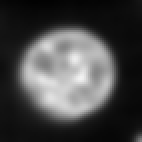

In [5]:
JIVECore.Data.Gray.(cell2[:,:,30])

In [6]:
i_cell_psf = ifftshift(cell_psf2);

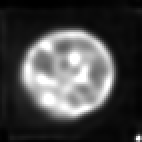

In [7]:
cell_res3 = JIVECore.Process.deconvRL(cell2, i_cell_psf, regularizer=nothing, iterations=30);
JIVECore.Data.Gray.(cell_res3[:,:,30])

## 3D


##### CY3

In [220]:
path = "images/CElegans/PSF-CElegans-CY3.tif"
psf_cy3 = JIVECore.Files.loadImage(path);
# JIVECore.Process.autoContrast(psf_cy3[:, :, 52])
psf_cy3 = JIVECore.Data.im2float(psf_cy3);

In [221]:
path = "images/CElegans/CElegans-CY3.tif"
cy3 = JIVECore.Files.loadImage(path);
cy3_image = JIVECore.Process.autoContrast(cy3[:, :, 52]);


In [222]:
cy3 = JIVECore.Data.im2float(cy3);
psf_cy3_shift = ifftshift(psf_cy3);

In [223]:
cy3_dec = JIVECore.Process.deconvRL(cy3, psf_cy3_shift, regularizer=nothing, iterations=50);


In [224]:
cy3_dec_image = JIVECore.Process.autoContrast(JIVECore.Data.Gray.(cy3_dec[:,:,52]));

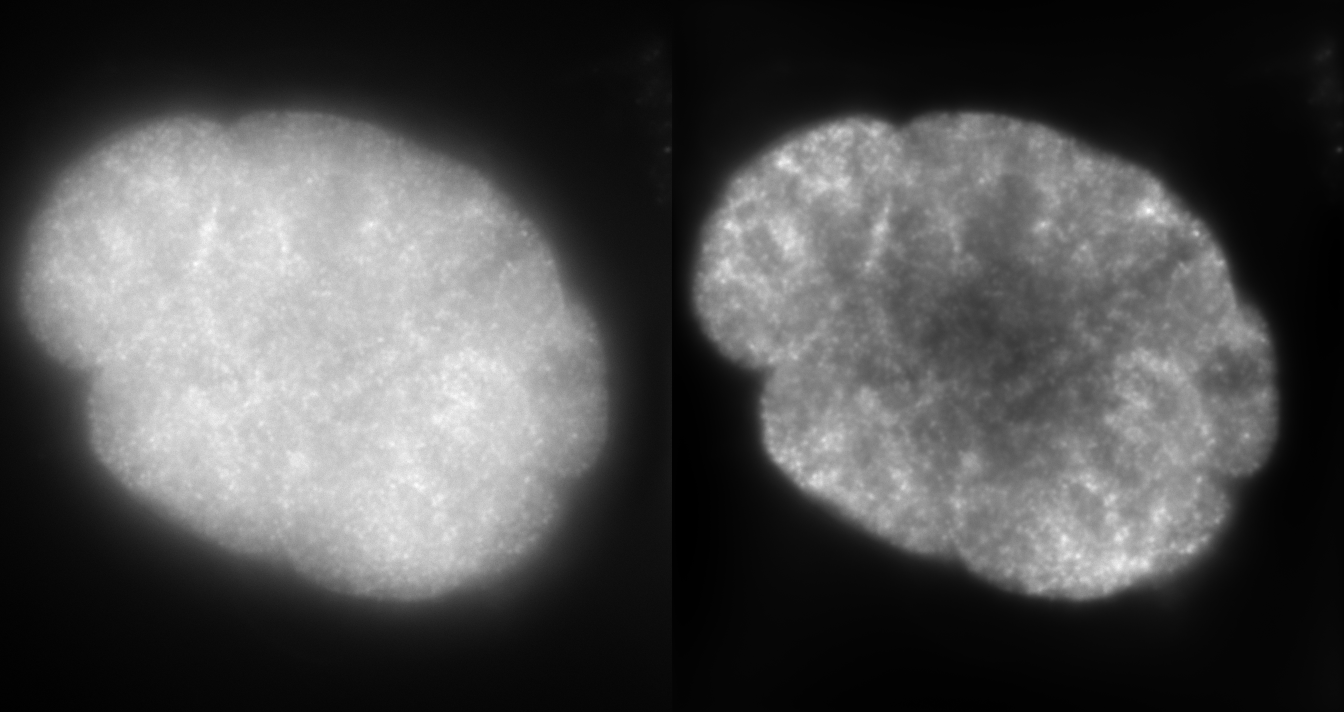

In [225]:
JIVECore.Visualize.mosaicview(cy3_image, cy3_dec_image; nrow = 1)

In [14]:
@benchmark JIVECore.Process.deconvRL(cy3, psf_cy3_shift, regularizer=nothing, iterations=1) samples=100 evals=10 seconds=60

BenchmarkTools.Trial: 3 samples with 10 evaluations per sample.
 Range (min … max):  2.959 s …   3.018 s  ┊ GC (min … max): 8.17% … 9.89%
 Time  (median):     2.965 s              ┊ GC (median):    8.25%
 Time  (mean ± σ):   2.981 s ± 32.483 ms  ┊ GC (mean ± σ):  8.78% ± 0.97%

  █    █                                                  █  
  █▁▁▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█ ▁
  2.96 s         Histogram: frequency by time        3.02 s <

 Memory estimate: 1.30 GiB, allocs estimate: 49.

##### DAPI

In [15]:
path = "images/CElegans/PSF-CElegans-DAPI.tif"
psf_dapi = JIVECore.Files.loadImage(path);
# JIVECore.Process.autoContrast(psf_dapi[:, :, 52])
psf_dapi = JIVECore.Data.im2float(psf_dapi);

In [16]:
path = "images/CElegans/CElegans-DAPI.tif"
dapi = JIVECore.Files.loadImage(path);
dapi_image = JIVECore.Process.autoContrast(dapi[:, :, 52]);

In [17]:
dapi = JIVECore.Data.im2float(dapi);
psf_dapi_shift = ifftshift(psf_dapi);

In [18]:
dapi_dec = JIVECore.Process.deconvRL(dapi, psf_dapi_shift, regularizer=nothing, iterations=50);

In [19]:
dapi_dec_image = JIVECore.Process.autoContrast(JIVECore.Data.Gray.(dapi_dec[:,:,52]));

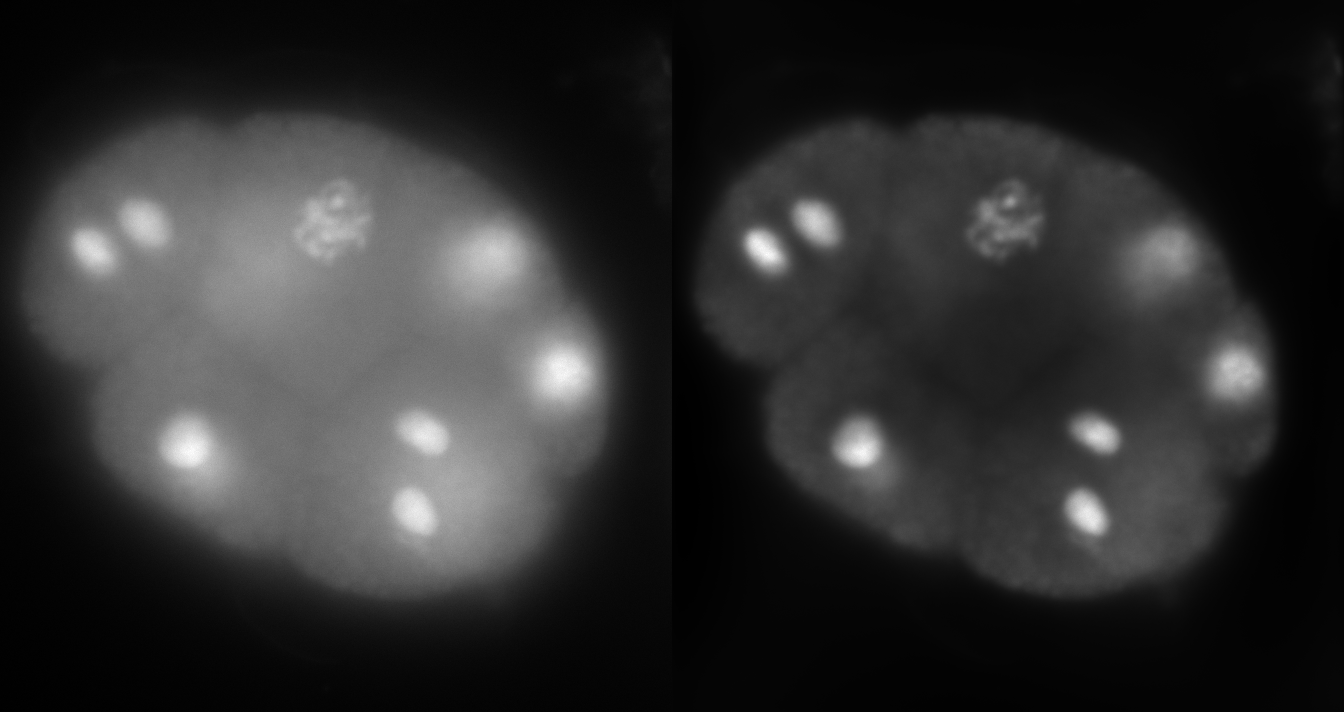

In [20]:
JIVECore.Visualize.mosaicview(dapi_image, dapi_dec_image; nrow = 1)

##### FITC

In [21]:
path = "images/CElegans/PSF-CElegans-FITC.tif"
psf_fitc = JIVECore.Files.loadImage(path);
# JIVECore.Process.autoContrast(psf_fitc[:, :, 52])
psf_fitc = JIVECore.Data.im2float(psf_fitc);

In [22]:
path = "images/CElegans/CElegans-FITC.tif"
fitc = JIVECore.Files.loadImage(path);
fitc_image = JIVECore.Process.autoContrast(fitc[:, :, 52]);


In [23]:
fitc = JIVECore.Data.im2float(fitc);
psf_fitc_shift = ifftshift(psf_fitc);

In [24]:
fitc_dec = JIVECore.Process.deconvRL(fitc, psf_fitc_shift, regularizer=nothing, iterations=50);

In [25]:
fitc_dec_image = JIVECore.Process.autoContrast(JIVECore.Data.Gray.(fitc_dec[:,:,52]));

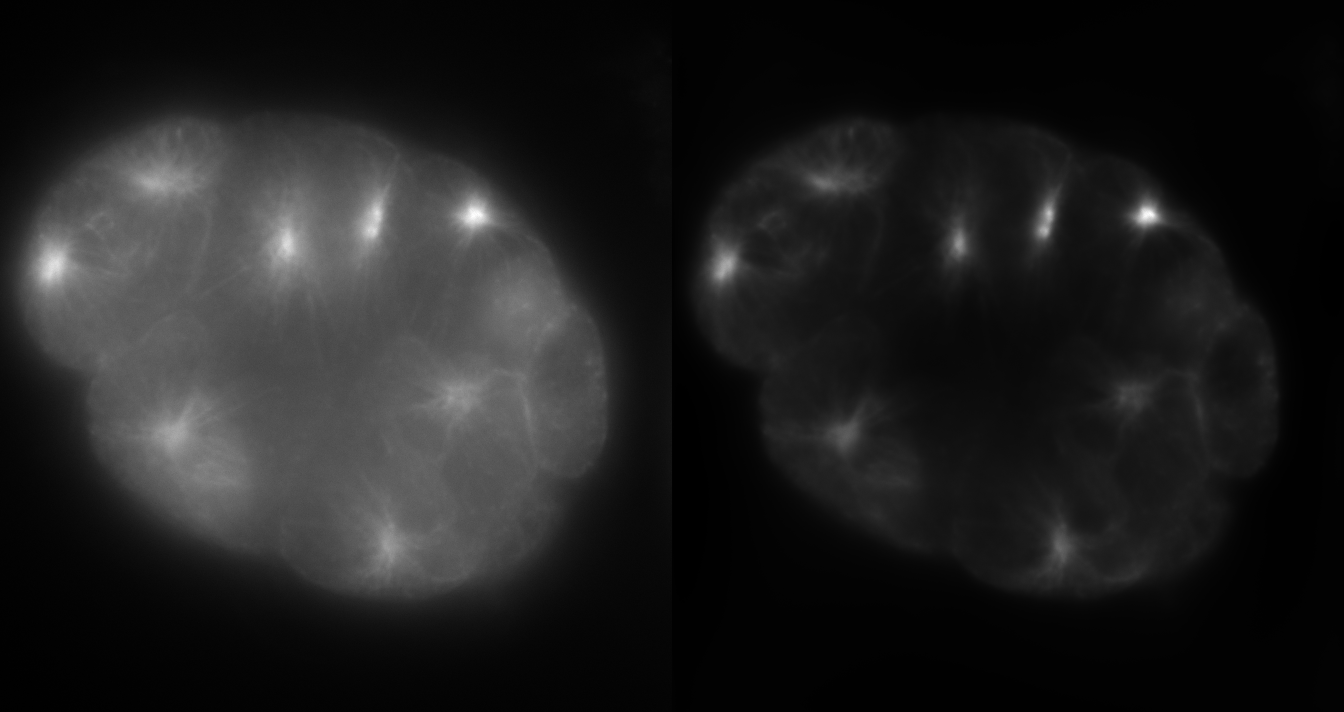

In [26]:
JIVECore.Visualize.mosaicview(fitc_image, fitc_dec_image; nrow = 1)

##### RGB

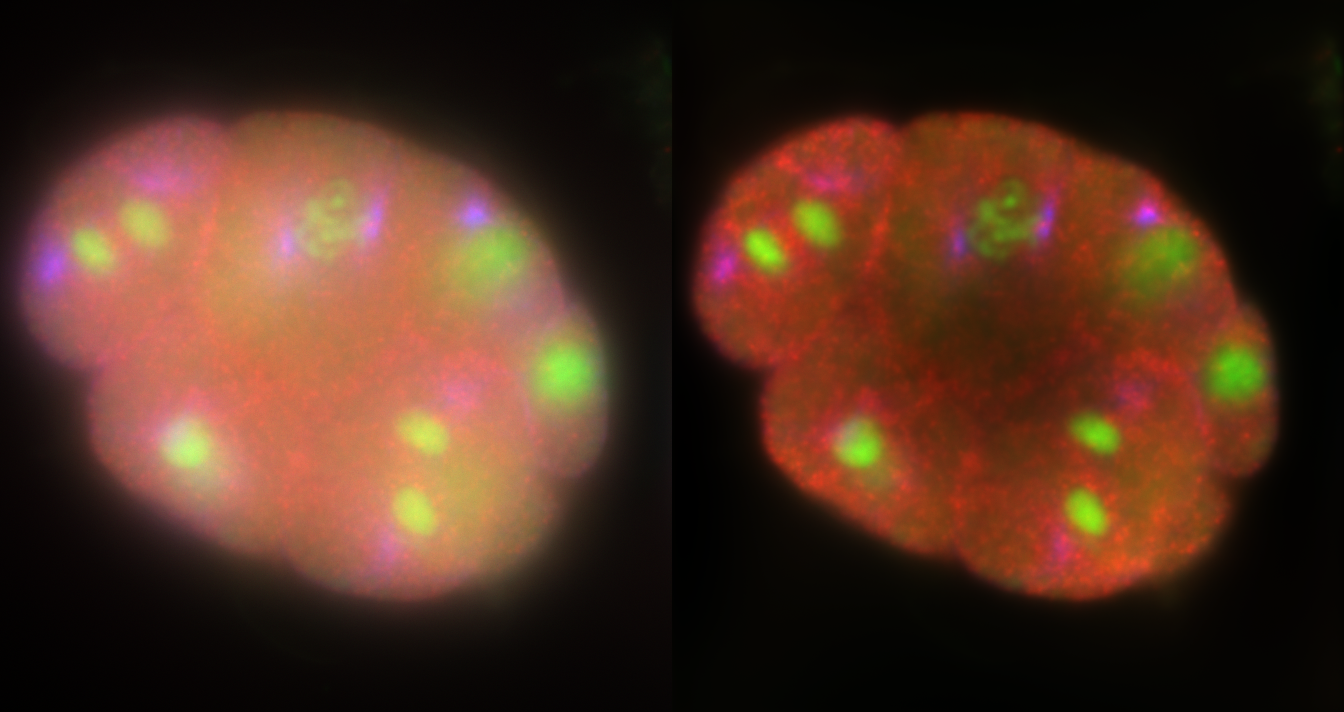

In [35]:
rgb_image = JIVECore.Data.colorview(JIVECore.Data.RGB, cy3_image, dapi_image, fitc_image)
rgb_image_dec = JIVECore.Data.colorview(JIVECore.Data.RGB, cy3_dec_image, dapi_dec_image, fitc_dec_image)
JIVECore.Visualize.mosaicview(rgb_image, rgb_image_dec; nrow = 1)

In [123]:
using FileIO

In [ ]:
"""
    normalize_stack(stack::Array{T,3}) where T<:Real

Normalizes a 3D array so that all values are scaled linearly to the [0.0, 1.0] range,
based on the global minimum and maximum values in the stack.

# Arguments:
- `stack`: A 3D array (e.g., height × width × depth) of real numbers.

# Returns:
- A 3D array of `Float32` values in the range [0.0, 1.0].
"""
function normalize_stack(stack::Array{T,3}) where T<:Real
    minval = minimum(stack)
    maxval = maximum(stack)
    range = maxval - minval
    @assert range > 0 "Stack has no dynamic range (all values are equal)."
    return Float32.((stack .- minval) ./ range)
end



normalize_stack

In [240]:
function saveImageStack(stack::Array{T,3}, filename::String) where T<:Real
    stack = normalize_stack(stack)
    # pages = [JIVECore.Data.Gray.(stack[:, :, z]) for z in axes(stack, 3)]
    FileIO.save(filename, stack)
end

saveImageStack (generic function with 1 method)

In [241]:
saveImageStack(cy3_dec, "images/CElegans/CElegans-CY3-deconvolved.tif")
saveImageStack(dapi_dec, "images/CElegans/CElegans-DAPI-deconvolved.tif")
saveImageStack(fitc_dec, "images/CElegans/CElegans-FITC-deconvolved.tif")